<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Практика" data-toc-modified-id="Практика-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Практика</a></span><ul class="toc-item"><li><span><a href="#Определение-вероятности.-События" data-toc-modified-id="Определение-вероятности.-События-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Определение вероятности. События</a></span><ul class="toc-item"><li><span><a href="#Задача-1" data-toc-modified-id="Задача-1-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Задача 1</a></span></li><li><span><a href="#Задача-2" data-toc-modified-id="Задача-2-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Задача 2</a></span></li><li><span><a href="#Задача-3" data-toc-modified-id="Задача-3-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Задача 3</a></span></li><li><span><a href="#Задача-4" data-toc-modified-id="Задача-4-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Задача 4</a></span></li></ul></li><li><span><a href="#Вероятность-суммы-событий" data-toc-modified-id="Вероятность-суммы-событий-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вероятность суммы событий</a></span><ul class="toc-item"><li><span><a href="#Задача-5" data-toc-modified-id="Задача-5-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Задача 5</a></span></li><li><span><a href="#Задача-6" data-toc-modified-id="Задача-6-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Задача 6</a></span></li></ul></li><li><span><a href="#Случайные-величины" data-toc-modified-id="Случайные-величины-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Случайные величины</a></span><ul class="toc-item"><li><span><a href="#Задача-7" data-toc-modified-id="Задача-7-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Задача 7</a></span></li><li><span><a href="#Задача-8" data-toc-modified-id="Задача-8-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Задача 8</a></span></li></ul></li><li><span><a href="#Условные-вероятности" data-toc-modified-id="Условные-вероятности-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Условные вероятности</a></span><ul class="toc-item"><li><span><a href="#Задача-9" data-toc-modified-id="Задача-9-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Задача 9</a></span></li><li><span><a href="#Задача-10" data-toc-modified-id="Задача-10-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Задача 10</a></span></li></ul></li></ul></li></ul></div>

# Практика

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
N = 100000

## Определение вероятности. События

Требуется сгенерировать необходимые выборки и произвести по ним расчеты

### Задача 1
Брошено две монеты. Найти вероятность того, что монеты выпали разными сторонами

In [2]:
#Считаем выпадения первой монеты и второй монеты в отдельных списках
coin1 = pd.Series(np.random.randint(2, size = N))
coin2 = pd.Series(np.random.randint(2, size = N))
#Объединяем значения в датафрейм и для каждой пары значений фиксируем, совпадают ли они
coins_df = pd.concat([coin1, coin2], axis = 1).rename(columns = {0:'First coin', 1:'Second coin'})
coins_df['Different result'] = coins_df['First coin'] != coins_df['Second coin']
#Считаем, сколько отличающихся значений в процентах приходится на весь датафрейм
result_series = (coins_df['Different result'].value_counts()/N*100).sort_index(ascending=False)
str(result_series[0].round(2))+'%'

'49.96%'

### Задача 2
Брошено три монеты. Описать множество всех элементарных событий. Найти вероятности следующих событий:


1.   A = {не выпало ни одного герба}
2.   B = {выпало четное число гербов}
3.   C = {на третьей монете выпал герб}


In [3]:
#Множество элементарных событий
elem_df = pd.DataFrame()
i=0
while i<8:
    bin_i = format(i,'b').zfill(3)
    temp_series = pd.Series([bin_i[0], bin_i[1], bin_i[2]])
    elem_df = pd.concat([elem_df, temp_series], axis = 1)
    i+=1
elem_df.rename(index = {0: 'Coin1',1:'Coin2',2:'Coin3'}, inplace=True)
elem_df.set_axis(['1', '2', '3', '4', '5','6','7','8'], axis=1, inplace=True)
elem_df = elem_df.replace('0', 'Решка').replace('1', 'Орёл')
elem_df

,1,2,3,4,5,6,7,8
Coin1,Решка,Решка,Решка,Решка,Орёл,Орёл,Орёл,Орёл
Coin2,Решка,Решка,Орёл,Орёл,Решка,Решка,Орёл,Орёл
Coin3,Решка,Орёл,Решка,Орёл,Решка,Орёл,Решка,Орёл


In [102]:
#Повторяем формирование датафрейма из первого задания, но с 3-мя монетами
coin1 = pd.Series(np.random.randint(2, size = N))
coin2 = pd.Series(np.random.randint(2, size = N))
coin3 = pd.Series(np.random.randint(2, size = N))
coins_df = pd.concat([coin1, coin2, coin3], axis = 1).rename(columns = {0:'First coin', 
                                                                        1:'Second coin', 
                                                                        2:'Third coin'})

#Считаем в отдельных колонках события A, B и C
coins_df['A'] = (coins_df['First coin']==0)&(coins_df['Second coin']==0)&(coins_df['Third coin'] == 0)
coins_df['B'] = ((coins_df['First coin']+coins_df['Second coin']+coins_df['Third coin'])%2 == 0)&((coins_df['First coin']+coins_df['Second coin']+coins_df['Third coin'])!=0)
coins_df['C'] = coins_df['Third coin'] == 1
result_A = (coins_df['A'].value_counts()/N*100).sort_index(ascending=False)
result_B = (coins_df['B'].value_counts()/N*100).sort_index(ascending=False)
result_C = (coins_df['C'].value_counts()/N*100).sort_index(ascending=False)
print(str(result_A.iloc[0].round(2)) + '% - не выпало ни одного герба\n' + str(result_B.iloc[0].round(2)) + '% - выпало четное число гербов\n'+str(result_C.iloc[0].round(2)) +'% - на третьей монете выпал герб')

12.57% - не выпало ни одного герба
37.55% - выпало четное число гербов
49.97% - на третьей монете выпал герб


Предлагается также решить задачи: 

### Задача 3
Из двух претендентов E и L на ответственную должность три члена комиссии должны отобрать одного. Каждый член комиссии должен указать либо одного достойного, либо забраковать обоих. Претендент считается выбранным, если он был признана достойным хотя бы двумя членами комиссии.
Найти вероятность событий:

A = {рекомендован L}, B = {рекомендован E}


In [114]:
# Предположим, что вероятность выбора первого, второго и никого из двух одинаковая, т.к. в тексте задачи это не указано
choice_1 = pd.Series(np.random.randint(3, size = N))
choice_2 = pd.Series(np.random.randint(3, size = N))
choice_3 = pd.Series(np.random.randint(3, size = N))
choices_df = pd.concat([choice_1, choice_2, choice_3], axis = 1)
choices_df['Рекомендован L'] = ((choices_df[0] == 1) & (choices_df[1] == 1))|((choices_df[0] == 1) & (choices_df[2] == 1))|((choices_df[1] == 1) & (choices_df[2] == 1))
choices_df['Рекомендован E'] = ((choices_df[0] == 2) & (choices_df[1] == 2))|((choices_df[0] == 2) & (choices_df[2] == 2))|((choices_df[1] == 2) & (choices_df[2] == 2))

result_L = (choices_df['Рекомендован L'].value_counts()/N*100).sort_index(ascending=False)
result_E = (choices_df['Рекомендован E'].value_counts()/N*100).sort_index(ascending=False)
print(str(result_L.iloc[0].round(2)) + '% - вероятность того, что рекомендован L\n' + str(result_E.iloc[0].round(2)) + '% - вероятность того, что рекомендован B')

26.03% - вероятность того, что рекомендован L
25.83% - вероятность того, что рекомендован B


### Задача 4
Брошено две игральных кости. Описать множество элементарных событий. Найти вероятности событий:

A = {вышло две "шестерки"}

B = {сумма выпавших очков не меньше 11}

C = {не выпала ни одна "шестерка"}

In [10]:
#Создаем таблицу сумм значений на гранях кубиков
dices_arr = []
for i in range(6):
    temp_arr =[]
    for j in range(6):
        temp_arr.append(j+1+i+1)
    dices_arr.append(temp_arr)
dices_df = pd.DataFrame(dices_arr, index = [1,2,3,4,5,6], columns = [1,2,3,4,5,6])
dices_df

,1,2,3,4,5,6
1,2,3,4,5,6,7
2,3,4,5,6,7,8
3,4,5,6,7,8,9
4,5,6,7,8,9,10
5,6,7,8,9,10,11
6,7,8,9,10,11,12


In [135]:
#Собираем датафрейм
two_throws_df = pd.DataFrame()
dice_1 = pd.Series(np.random.randint(6, size = N))
dice_2 = pd.Series(np.random.randint(6, size = N))
two_throws_df = pd.concat([dice_1+1, dice_2+1], axis = 1)
two_throws_df.rename(columns = {0:'First',1:'Second'}, inplace = True)
two_throws_df['Sum']=two_throws_df['First']+two_throws_df['Second']
two_throws_df['Sixes']=(two_throws_df['First']!=6)&(two_throws_df['Second']!=6)
two_throws_df.head()
result_A = (two_throws_df['Sum'].value_counts()/N*100).sort_index(ascending=False)
result_B = result_A[12]+result_A[11]
result_C = (two_throws_df['Sixes'].value_counts()/N*100).sort_index(ascending=False)
print(str(result_A[12].round(2)) + '% - вышло две "шестерки"\n' + str(result_B.round(2)) + '% - сумма выпавших очков не меньше 11\n'+str(result_C.iloc[0].round(2)) +'% - не выпала ни одна "шестерка"')

2.8% - вышло две "шестерки"
8.43% - сумма выпавших очков не меньше 11
69.4% - не выпала ни одна "шестерка"


## Вероятность суммы событий

### Задача 5
Брошены две игральные кости. Найти вероятность события D = {выпала хотя бы одна шестёрка}


In [129]:
#Переиспользуем датафрейм из предыдущего задания
#В колонке Sixes считается вероятность того, что не выпала ни одна шестерка
#Соответственно, если выпала хоть одна шестерка, в этой колонке будет False
str(result_C.iloc[1].round(2)) +'% - выпала хотя бы одна шестёрка'

'30.54% - выпала хотя бы одна шестёрка'

Предлагается также решить задачи: 

### Задача 6
В телефонном номере три последние цифры стерлись. Считая, что все возможные значения стершихся цифр равновероятны, найти вероятность событий:

A = {Стерлись различные цифры},

B = {Стерлись одинаковые цифры},

C = {Среди стершихся цифр хотя бы две совпадают},

D = {Среди стершихся цифр хотя бы две различны}


In [13]:
first_digit = pd.Series(np.random.randint(10, size = N))
second_digit = pd.Series(np.random.randint(10, size = N))
third_digit = pd.Series(np.random.randint(10, size = N))
phone_num_df = pd.concat([first_digit, second_digit, third_digit], axis = 1)
phone_num_df.rename(columns = {0: 'First',1:'Second',2:'Third'}, inplace=True)
#Считаем количество случаев, когда а) Все цифры попадают под один признак (логическое "И") б) Любые две цифры попадают под признак (Логическое "Или")
phone_num_df['All_Different']=(phone_num_df['First']!=phone_num_df['Second'])&(phone_num_df['First']!=phone_num_df['Third'])&(phone_num_df['Second']!=phone_num_df['Third'])
phone_num_df['All_Same']=(phone_num_df['First']==phone_num_df['Second'])&(phone_num_df['First']==phone_num_df['Third'])
phone_num_df['At_least_two_same']=(phone_num_df['First']==phone_num_df['Second'])|(phone_num_df['First']==phone_num_df['Third'])|(phone_num_df['Second']==phone_num_df['Third'])
phone_num_df['At_least_two_different']=(phone_num_df['First']!=phone_num_df['Second'])|(phone_num_df['First']!=phone_num_df['Third'])|(phone_num_df['Second']!=phone_num_df['Third'])
phone_num_df.head()

,First,Second,Third,All_Different,All_Same,At_least_two_same,At_least_two_different
0,6,0,5,True,False,False,True
1,3,5,9,True,False,False,True
2,8,1,7,True,False,False,True
3,6,8,5,True,False,False,True
4,0,9,8,True,False,False,True


In [14]:

#Считаем вероятности по колонкам
result_A = (phone_num_df['All_Different'].value_counts()/N*100).sort_index(ascending=False)
print(str(result_A[0].round(2)) +'% - Стерлись различные цифры')
result_B = (phone_num_df['All_Same'].value_counts()/N*100).sort_index(ascending=False)
print(str(result_B[1].round(2)) +'% - Стерлись одинаковые цифры')
result_C = (phone_num_df['At_least_two_same'].value_counts()/N*100).sort_index(ascending=False)
print(str(result_C[0].round(2)) +'% - Среди стершихся цифр хотя бы две совпадают')
result_D = (phone_num_df['At_least_two_different'].value_counts()/N*100).sort_index(ascending=False)
print(str(result_D[1].round(2)) +'% - Среди стершихся цифр хотя бы две различны')


28.34% - Стерлись различные цифры
1.0% - Стерлись одинаковые цифры
71.66% - Среди стершихся цифр хотя бы две совпадают
99.0% - Среди стершихся цифр хотя бы две различны


## Случайные величины

### Задача 7
В лотерее имеется 10 билетов, из которых один выигрышный. Размер выигрыша 10 ден. ед.; стоимость билета 1 ден ед. Найти закон распределения случайной величины X, равной чистому выигрышу участника лотереи, который вытаскивает билет первым.

100%|████████████████████████████████| 100000/100000 [00:02<00:00, 44243.20it/s]


Средняя сумма выигрыша в зависимости от количества игр:
1      4.0016
2      8.0086
3     11.9866
4     15.9911
5     19.9680
6     23.9848
7     27.9706
8     31.9998
9     36.0085
10    40.0199
11    44.1155
12    48.0026
13    52.0010
14    56.1265
15    59.9522
16    64.0686
17    68.0232
18    71.8888
19    76.1327
20    80.0588
dtype: float64


<AxesSubplot:>

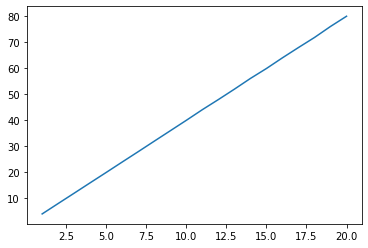

In [156]:
#Составим массив из вероятных исходов каждой лотереи
lottery_arr = [-1,9]
#Посчитаем суммарный выигрыш при разном количестве игр (от 1 до 20)
play_attempts_df = pd.DataFrame()
for i in range(20):  
    temp_arr = []
    for j in tqdm(range(N)):
        temp_arr.append(np.random.choice(lottery_arr,i+1).sum())
    play_attempts_df = pd.concat([play_attempts_df, pd.Series(temp_arr, name = i+1)], axis = 1)
#Посчитаем средний выигрыш в N серий с разным количеством игр
print("Средняя сумма выигрыша в зависимости от количества игр:")
print(play_attempts_df.mean())
play_attempts_df.mean().plot()

Предлагается также решить задачу: 

### Задача 8
Брошены две игральные кости. Найти закон распределения случайной величины $X$, равной сумме выпавших очков. Найти вероятности событий ${X <= 4}$, ${X > 4}$

2     0.02775
3     0.05524
4     0.08383
5     0.11128
6     0.13942
7     0.16634
8     0.13869
9     0.11287
10    0.08230
11    0.05520
12    0.02708
Name: Sum, dtype: float64
𝑋<=4:  0.16682
𝑋>4:  0.83318


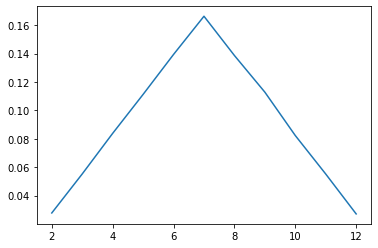

In [16]:
first_dice=pd.Series(np.random.randint(6, size = N)+1)
second_dice=pd.Series(np.random.randint(6, size = N)+1)
two_throws_df = pd.concat([first_dice, second_dice], axis = 1)
two_throws_df.rename(columns = {0:'First',1:'Second'}, inplace = True)

two_throws_df['Sum']=two_throws_df['First']+two_throws_df['Second']
values = (two_throws_df['Sum'].value_counts()/N).sort_index(ascending=True)
print(values)
plt.plot(values)
print('𝑋<=4: ',values.iloc[0:3].sum())
print('𝑋>4: ',values.iloc[3:].sum())

## Условные вероятности

### Задача 9
Из колоды (36 карт) вынимают последовательно без возвращения две карты. Найти вероятность того, что первой картой была шестерка, а второй — семерка. Найти условную вероятность того же события при условии, что обе карты бубновой масти.


In [17]:
#Формируем выбор из двух карт на каждый случай
cards_arr = []
for i in range(N):
    x = np.random.choice(range(1,36), size=2, replace=True)
    cards_arr.append(x)
cards_df = pd.DataFrame(cards_arr, columns = ['First', 'Second'])
cards_df.head()

,First,Second
0,13,25
1,14,9
2,30,10
3,17,15
4,9,28


In [18]:
# Для этой задачи предположим, что шестерки - это значения 1, 2, 3 и 4, а семерки - 5, 6, 7, 8
cards_df['Match']=(cards_df['First'].isin([1,2,3,4]))&(cards_df['Second'].isin([5,6,7,8]))
cards_df[cards_df['Match'] == True]

,First,Second,Match
213,4,8,True
527,3,5,True
565,4,8,True
621,4,6,True
767,1,7,True
...,...,...,...
99768,3,5,True
99772,2,5,True
99783,2,7,True
99878,2,8,True


In [19]:
# Бубновые карты в рамках этой задачи - те, что делятся на 4 без остатка. Бубновые 6 и 7 - 4 и 8 соответственно
cards_df['SuitMatch']=(cards_df['First']%4==0)&(cards_df['Second']%4==0)
cards_df[cards_df['SuitMatch'] == True]

,First,Second,Match,SuitMatch
54,28,28,False,True
71,4,20,False,True
86,4,28,False,True
101,28,24,False,True
103,8,28,False,True
...,...,...,...,...
99933,28,32,False,True
99949,28,4,False,True
99957,16,20,False,True
99965,32,20,False,True


In [20]:
#Считаем вероятности двух событий и условную вероятность
prob_A = cards_df['Match'].sum()/N
prob_B = cards_df[cards_df['SuitMatch'] & cards_df['Match']]['Match'].sum()/N
prob_rel = prob_B/prob_A
print('Вероятность первой шестерки и второй семерки - ', prob_A)
print('Вероятность бубновых шестерки и семерки - ', prob_B)
print('Условная вероятность - ', prob_rel)

Вероятность первой шестерки и второй семерки -  0.01327
Вероятность бубновых шестерки и семерки -  0.00096
Условная вероятность -  0.07234363225320271


Предлагается также решить задачу: 

### Задача 10
Из урны, содержащей два белых и три черных шара, последовательно извлекают два шара; вынутые шары не возвращаются. Если первый шар оказался черным, то перед вторым извлечением в урну добавляют белый шар. В противном случае состав оставшихся шаров не меняют. Найти вероятности событий:

$A$ = {извлечены два белых шара},

$B$ = {извлечены два черных шара}

Указание. Пусть событие $C_1$ = {первый шар белый}, событие $C_2$ = {второй шар белый}. Тогда $A = C_1C_2$, $B = \overline C_1 \overline C_2$ 

In [41]:
# Формируем выборку из N событий
choices_arr1 = []
choices_arr2 = []
for i in range(N):
    basket_arr = [1]*2 +[0]*3
    chosen_ball = np.random.choice(basket_arr)
    choices_arr1.append(chosen_ball)
    basket_arr.remove(chosen_ball)
    if chosen_ball == 0:
        basket_arr.append(1)
    choices_arr2.append(np.random.choice(basket_arr))
ball_choices_df = pd.concat([pd.Series(choices_arr1), pd.Series(choices_arr2)], axis = 1)
ball_choices_df.rename(columns = {0:'First',1:'Second'}, inplace = True)

In [42]:
#Считаем количество нужных событий и их вероятность
ball_choices_df['Two whites'] = (ball_choices_df['First']==1) & (ball_choices_df['Second']==1)
ball_choices_df['Two blacks'] = (ball_choices_df['First']==0) & (ball_choices_df['Second']==0)
ball_choices_df.head() 

result_A = (ball_choices_df['Two whites'].value_counts()/N*100).sort_index(ascending=False)
print(str(result_A[1].round(2)) +'% - извлечены два белых шара')
result_B = (ball_choices_df['Two blacks'].value_counts()/N*100).sort_index(ascending=False)
print(str(result_B[1].round(2)) +'% - извлечены два черных шара')


9.95% - извлечены два белых шара
24.24% - извлечены два черных шара
